In [1]:
import pandas as pd
3import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [3]:
boston_df = pd.read_csv('csv/boston.csv')

In [4]:
boston_df.shape

(506, 14)

In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
boston_df.

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [13]:
import warnings
warnings.filterwarnings('ignore')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

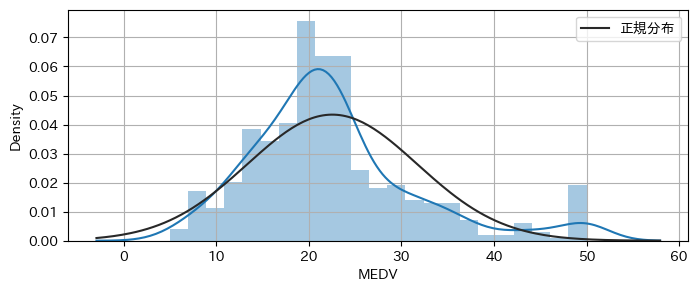

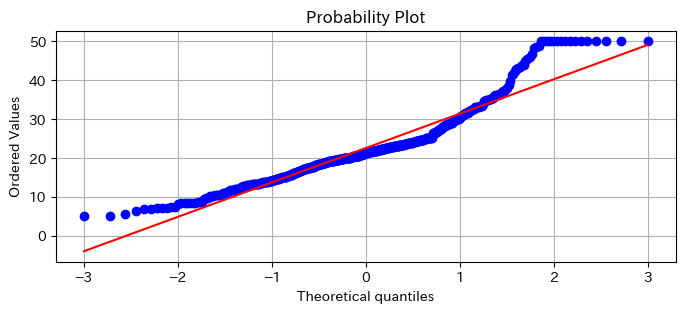

In [18]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize=[8, 3])
sns.distplot(boston_df['MEDV'], kde=True, fit=norm, fit_kws={'label':'正規分布'}).grid()
plt.legend()

#QQ　Plot
plt.figure(figsize=[8, 3])
plt.grid()
stats.probplot(boston_df['MEDV'], dist='norm', plot=plt)

#コルモゴロフ・スミルノフ検定（K-S検定）
stats.kstest(boston_df['MEDV'], 'norm')

"""
正規分布の帰無仮説が棄却 => 線形モデルの場合は正規分布に変換
残差が正規分布に従うため
"""

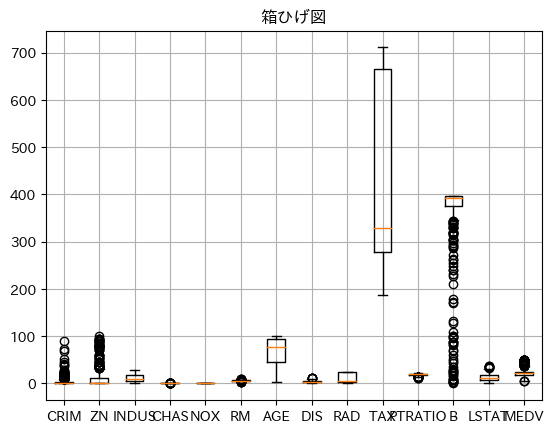

In [19]:
#外れ値確認

def hige_graph(cols):
    fig, ax = plt.subplots()
    data_ = []
    for col in cols:
        data_.append(boston_df[col])
    ax.set_title('箱ひげ図')
    ax.boxplot(data_, labels=cols)
    plt.grid()
    plt.show()
    
all_col = boston_df.columns
hige_graph(all_col)

<AxesSubplot:xlabel='ZN', ylabel='count'>

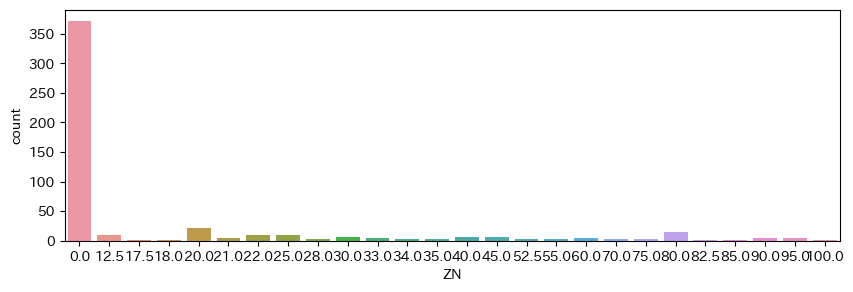

In [26]:
plt.figure(figsize=[10,3])
sns.countplot(boston_df['ZN'])

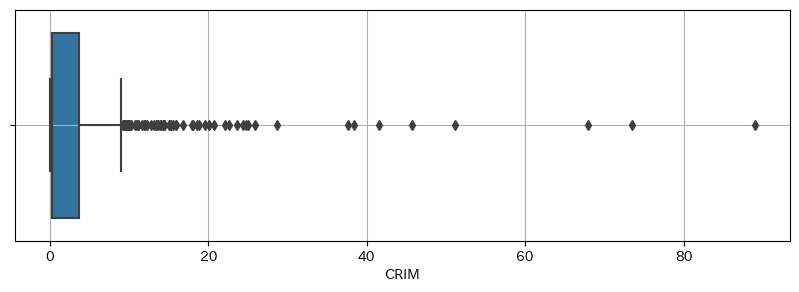

In [28]:
plt.figure(figsize=[10,3])
sns.boxplot(data=boston_df, x='CRIM').grid()

"""
（なぜ？）
80を外れ値と認定
犯罪率80%は疑わしい？？
"""

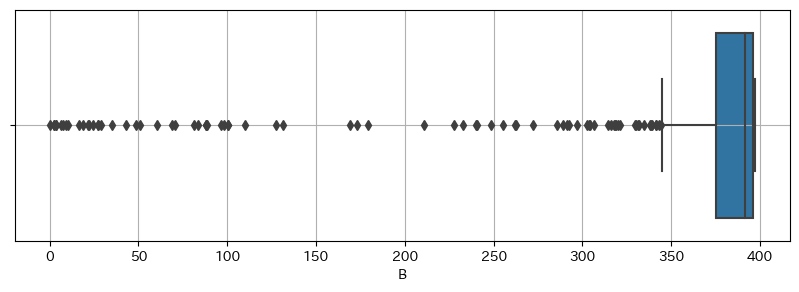

In [30]:
plt.figure(figsize=[10,3])
sns.boxplot(data=boston_df, x='B').grid()

"""

疑問
何%で切るか難しいところだが、0.1〜10%台は全体の1.5%。除外しても良いかもしれない。

0.1〜10%台は全体の1.5%はどこを見たらわかる？？

"""

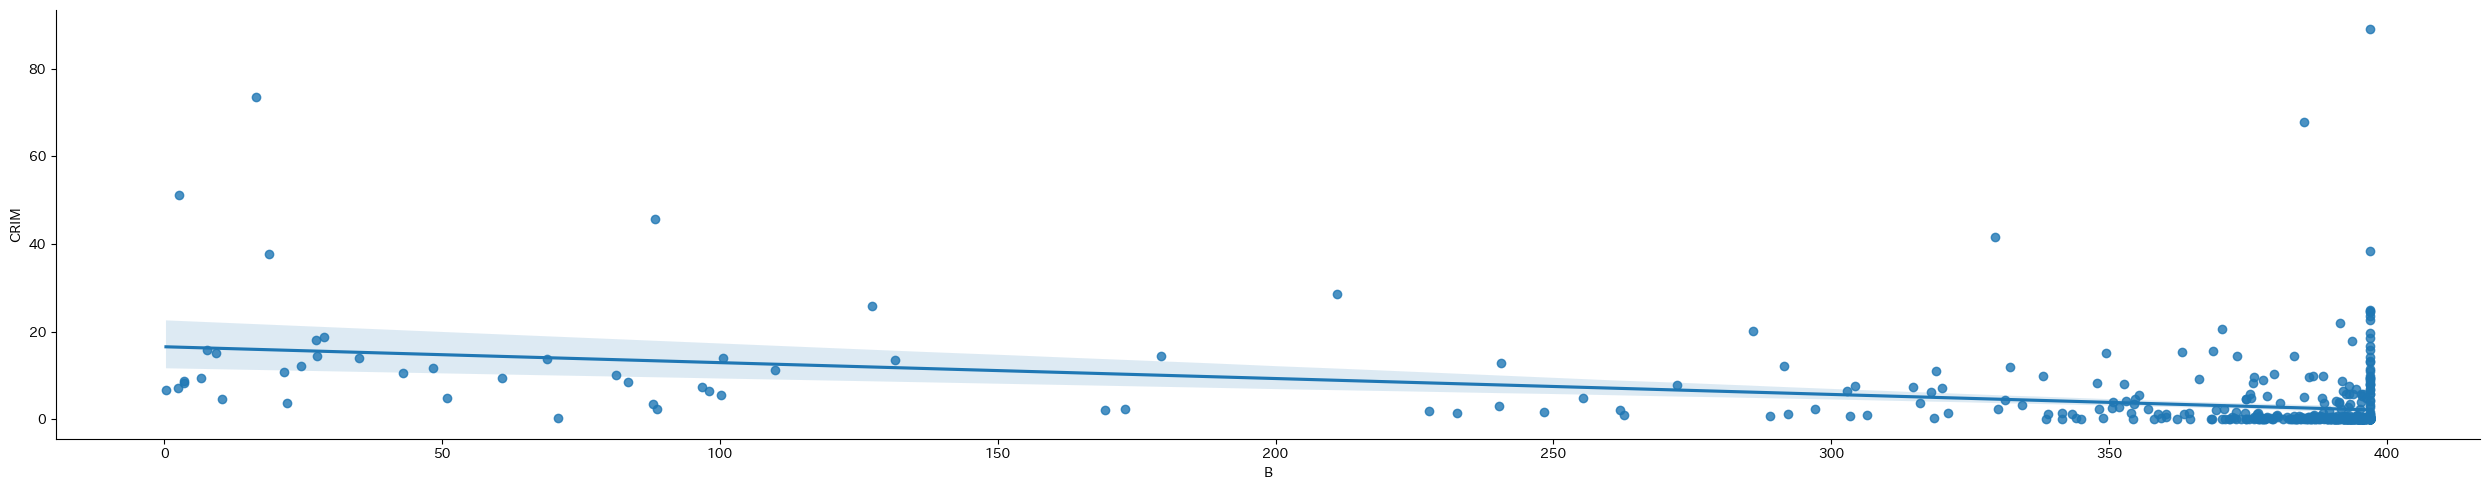

In [32]:
#散布図に線形回帰モデルを描写
sns.lmplot(x='B', y='CRIM', data=boston_df, aspect=5, height=5)

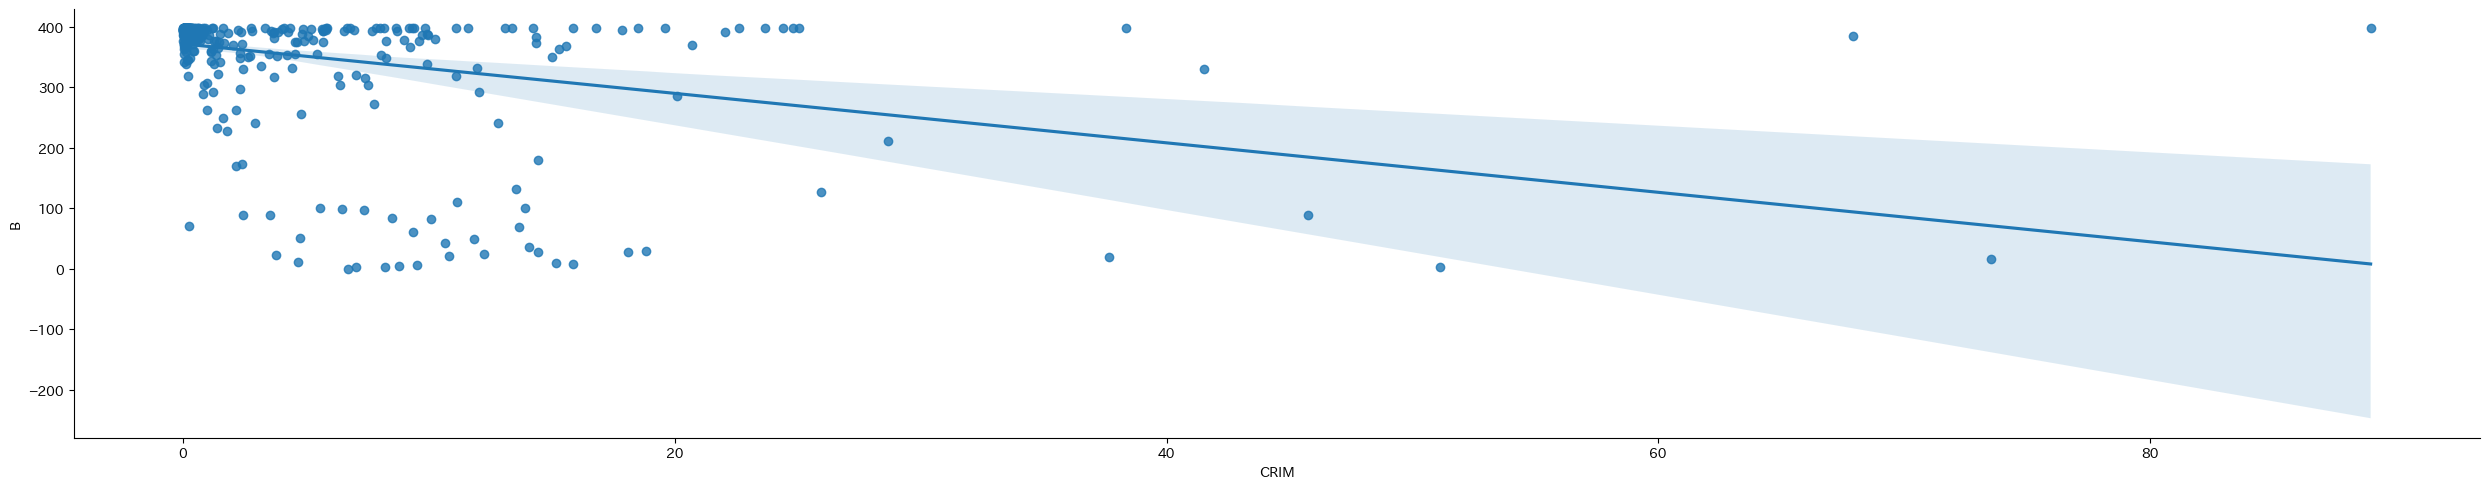

In [33]:
sns.lmplot(x='CRIM', y='B', data=boston_df, aspect=5, height=5)

## 単・多変量データ解析

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

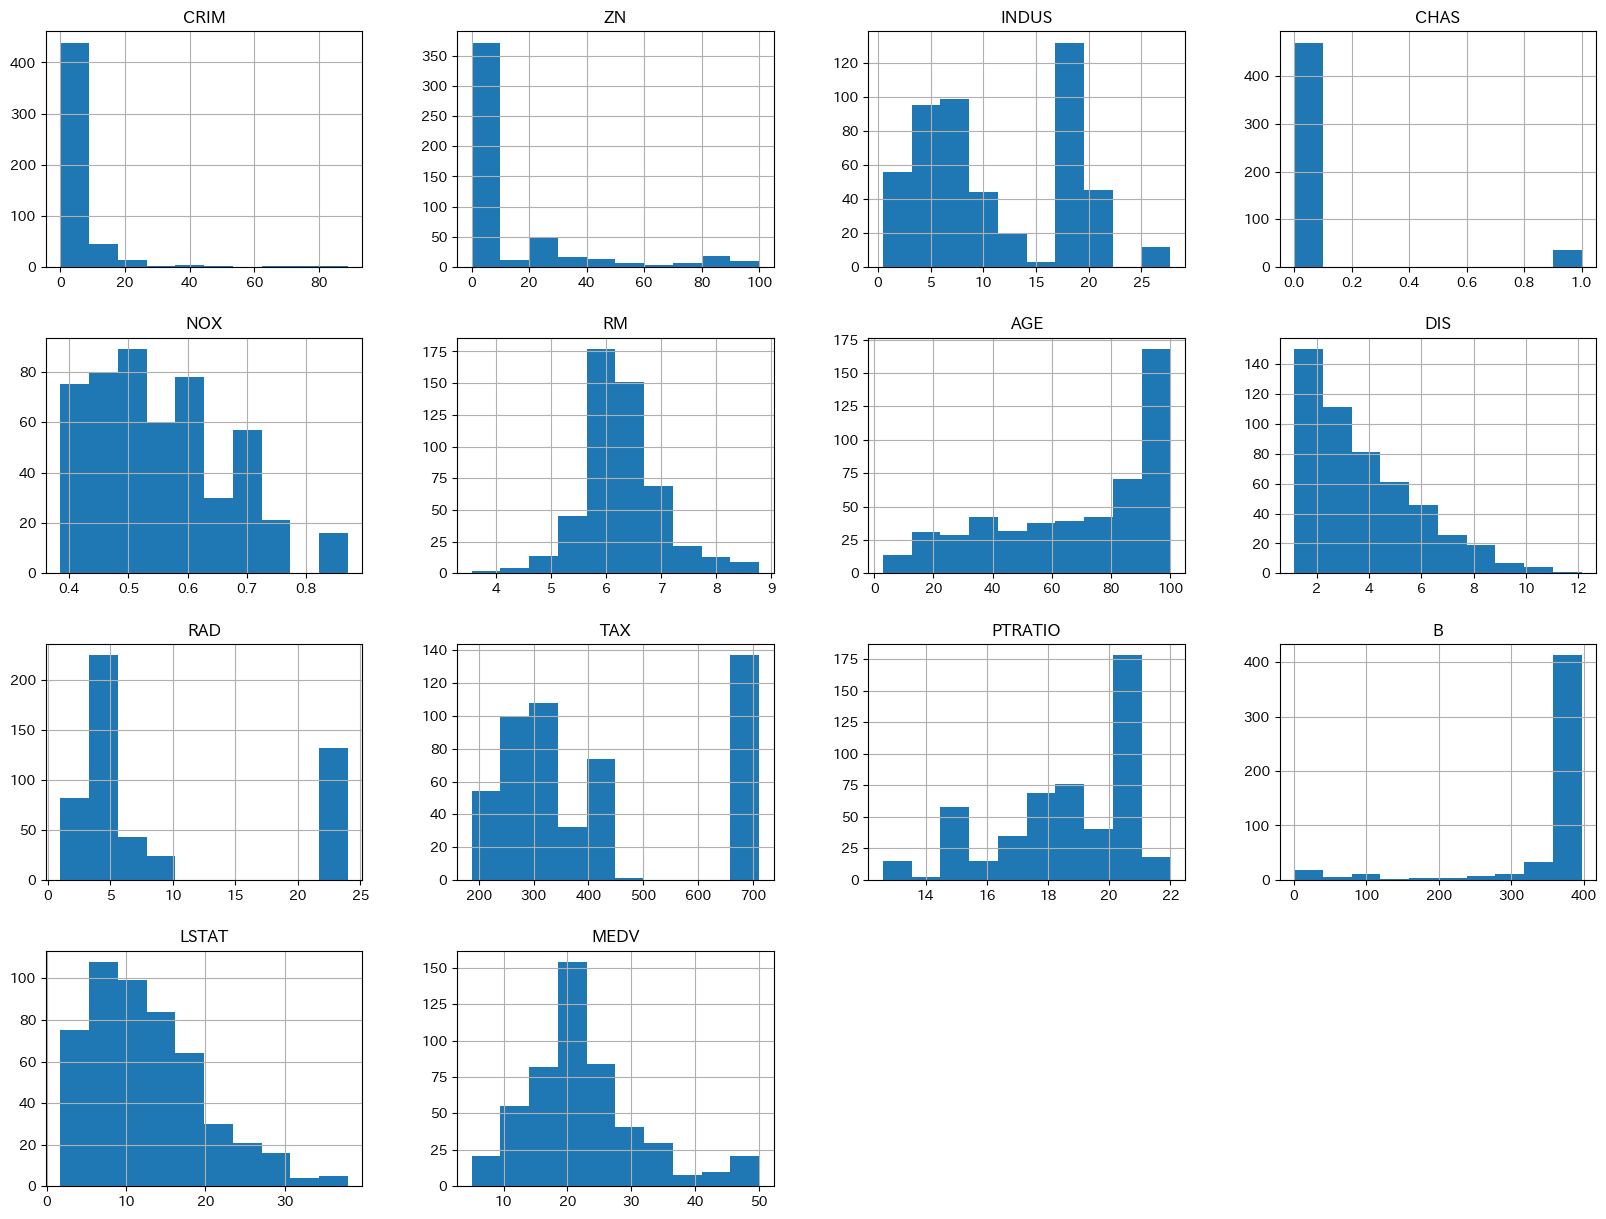

In [35]:
boston_df.hist(bins=10, figsize=(20, 15))

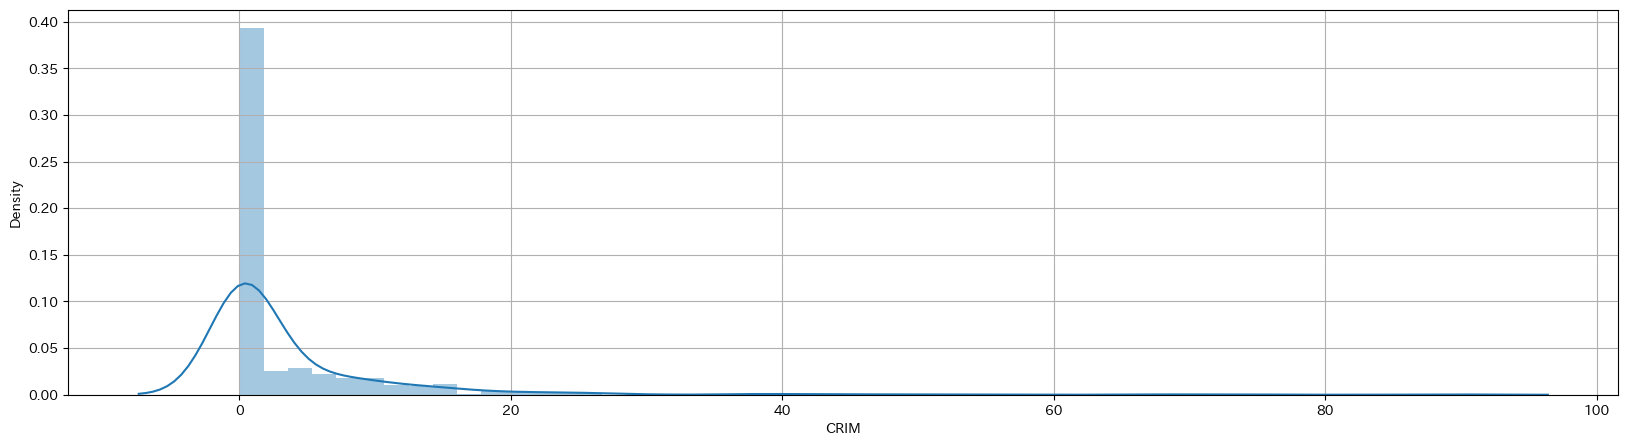

In [36]:
plt.figure(figsize=[20, 5])
sns.distplot(boston_df['CRIM']).grid()

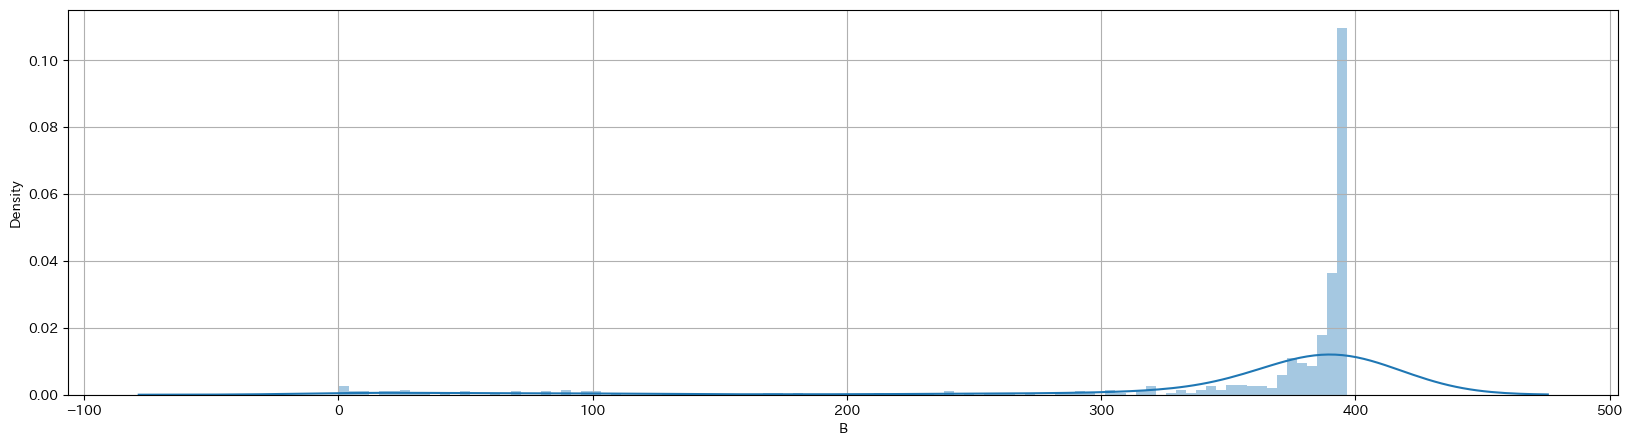

In [37]:
plt.figure(figsize=[20,5])
sns.distplot(boston_df['B'], bins=100).grid()

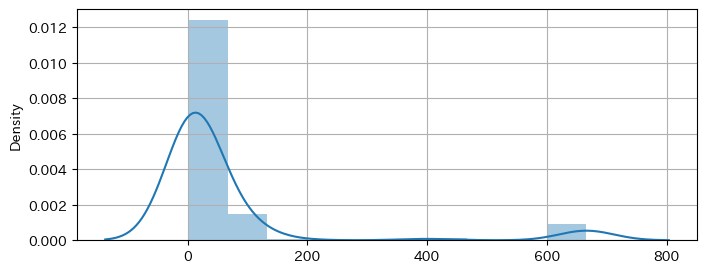

In [38]:
"""
疑問
boston_df[boston_df['B']<200はデータフレームなのになぜ描画されるのでしょうか？
"""
plt.figure(figsize=[8,3])
sns.distplot(boston_df[boston_df['B']<200], bins=10).grid()

In [53]:
boston_df[boston_df['B']<200].head()

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
102  0.22876  0.0   8.56     0  0.520  6.405   85.4  2.7147    5  384.0   
145  2.37934  0.0  19.58     0  0.871  6.130  100.0  1.4191    5  403.0   
146  2.15505  0.0  19.58     0  0.871  5.628  100.0  1.5166    5  403.0   
155  3.53501  0.0  19.58     1  0.871  6.152   82.6  1.7455    5  403.0   
156  2.44668  0.0  19.58     0  0.871  5.272   94.0  1.7364    5  403.0   

     PTRATIO       B  LSTAT  MEDV  
102     20.9   70.80  10.63  18.6  
145     14.7  172.91  27.80  13.8  
146     14.7  169.27  16.65  15.6  
155     14.7   88.01  15.02  15.6  
156     14.7   88.63  16.14  13.1

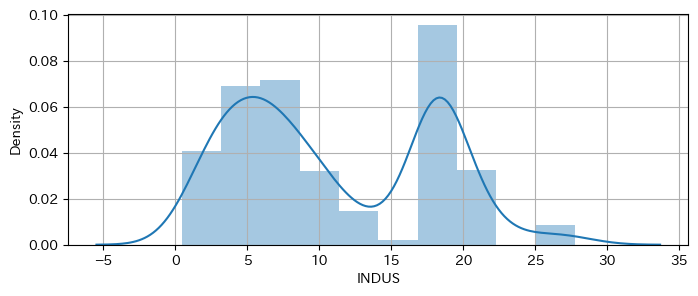

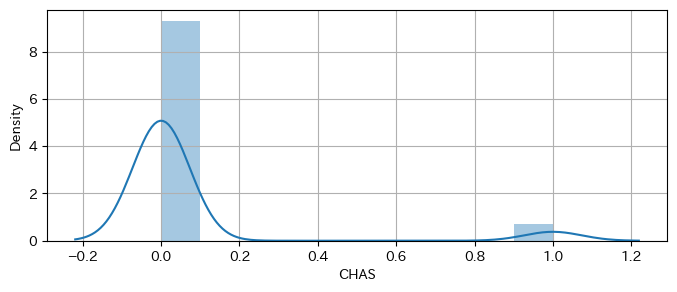

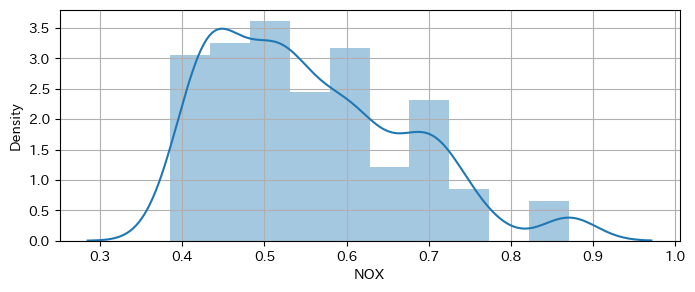

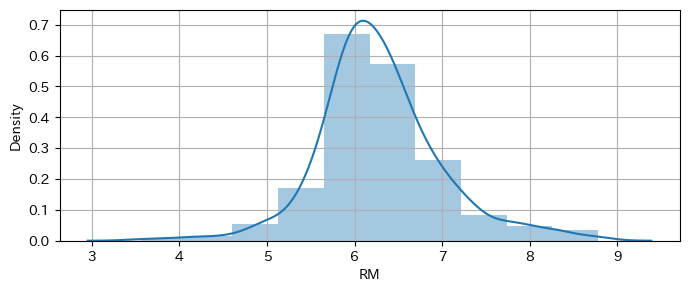

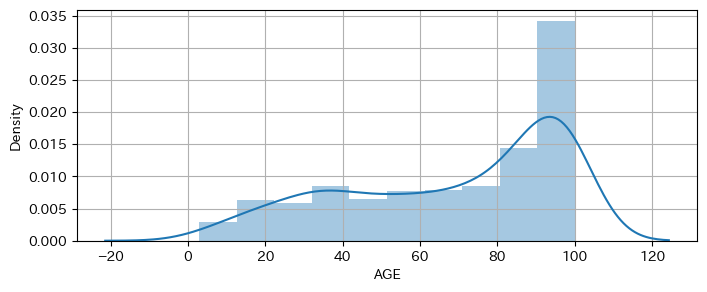

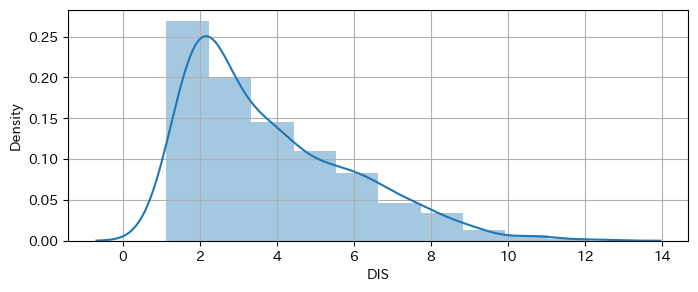

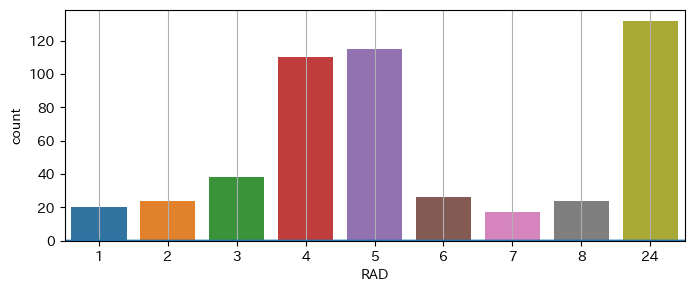

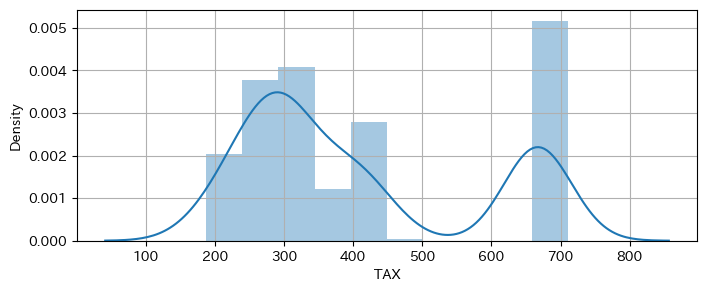

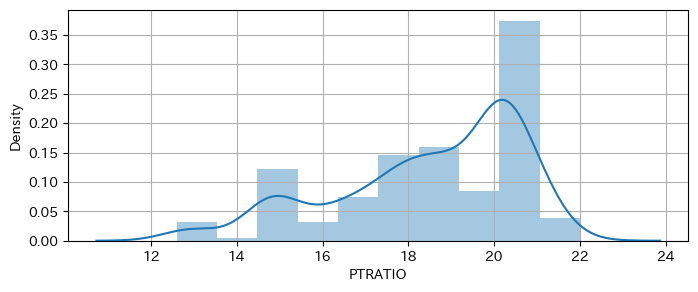

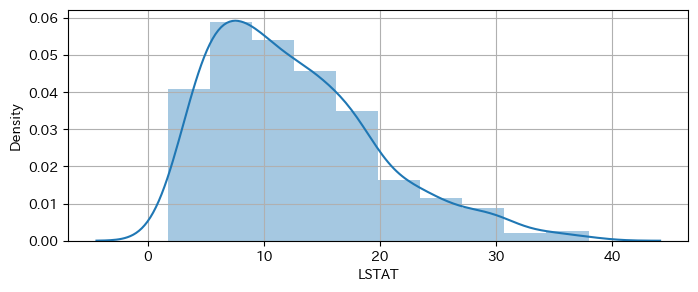

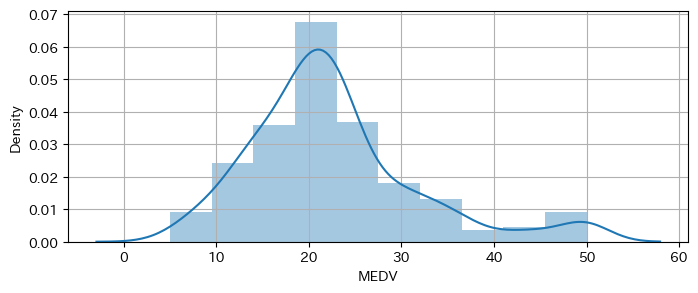

In [54]:
def sns_distplot(col_name, bins):
    plt.figure(figsize=[8,3])
    sns.distplot(boston_df[col_name], bins=bins).grid()
    
sns_distplot(col_name='INDUS', bins=10)

sns_distplot(col_name='CHAS', bins=10)

sns_distplot(col_name='NOX', bins=10)

sns_distplot(col_name='RM', bins=10)

sns_distplot(col_name='AGE', bins=10)

sns_distplot(col_name='DIS', bins=10)

sns_distplot(col_name='RAD', bins=10)

sns.countplot(boston_df["RAD"]).grid()

sns_distplot(col_name='TAX', bins=10)

sns_distplot(col_name='PTRATIO', bins=10)

sns_distplot(col_name='LSTAT', bins=10)

sns_distplot(col_name='MEDV', bins=10)

"""
NOX, RM, DIS, PTRATIO, LSTAT, MEDV
モデリングに線形モデルを用いる場合、正規分布に変換（近づける）する処理を施す。

疑問
・他の特徴量は？
・上でhistplotをしたのに個別でヒストグラムを描画する必要あるのか？
・正規分布かどうかは定量的な値が欲しいから、各特徴量のK-S検定をすれば良いのでは？？
"""

## 多変量データ解析

array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='R

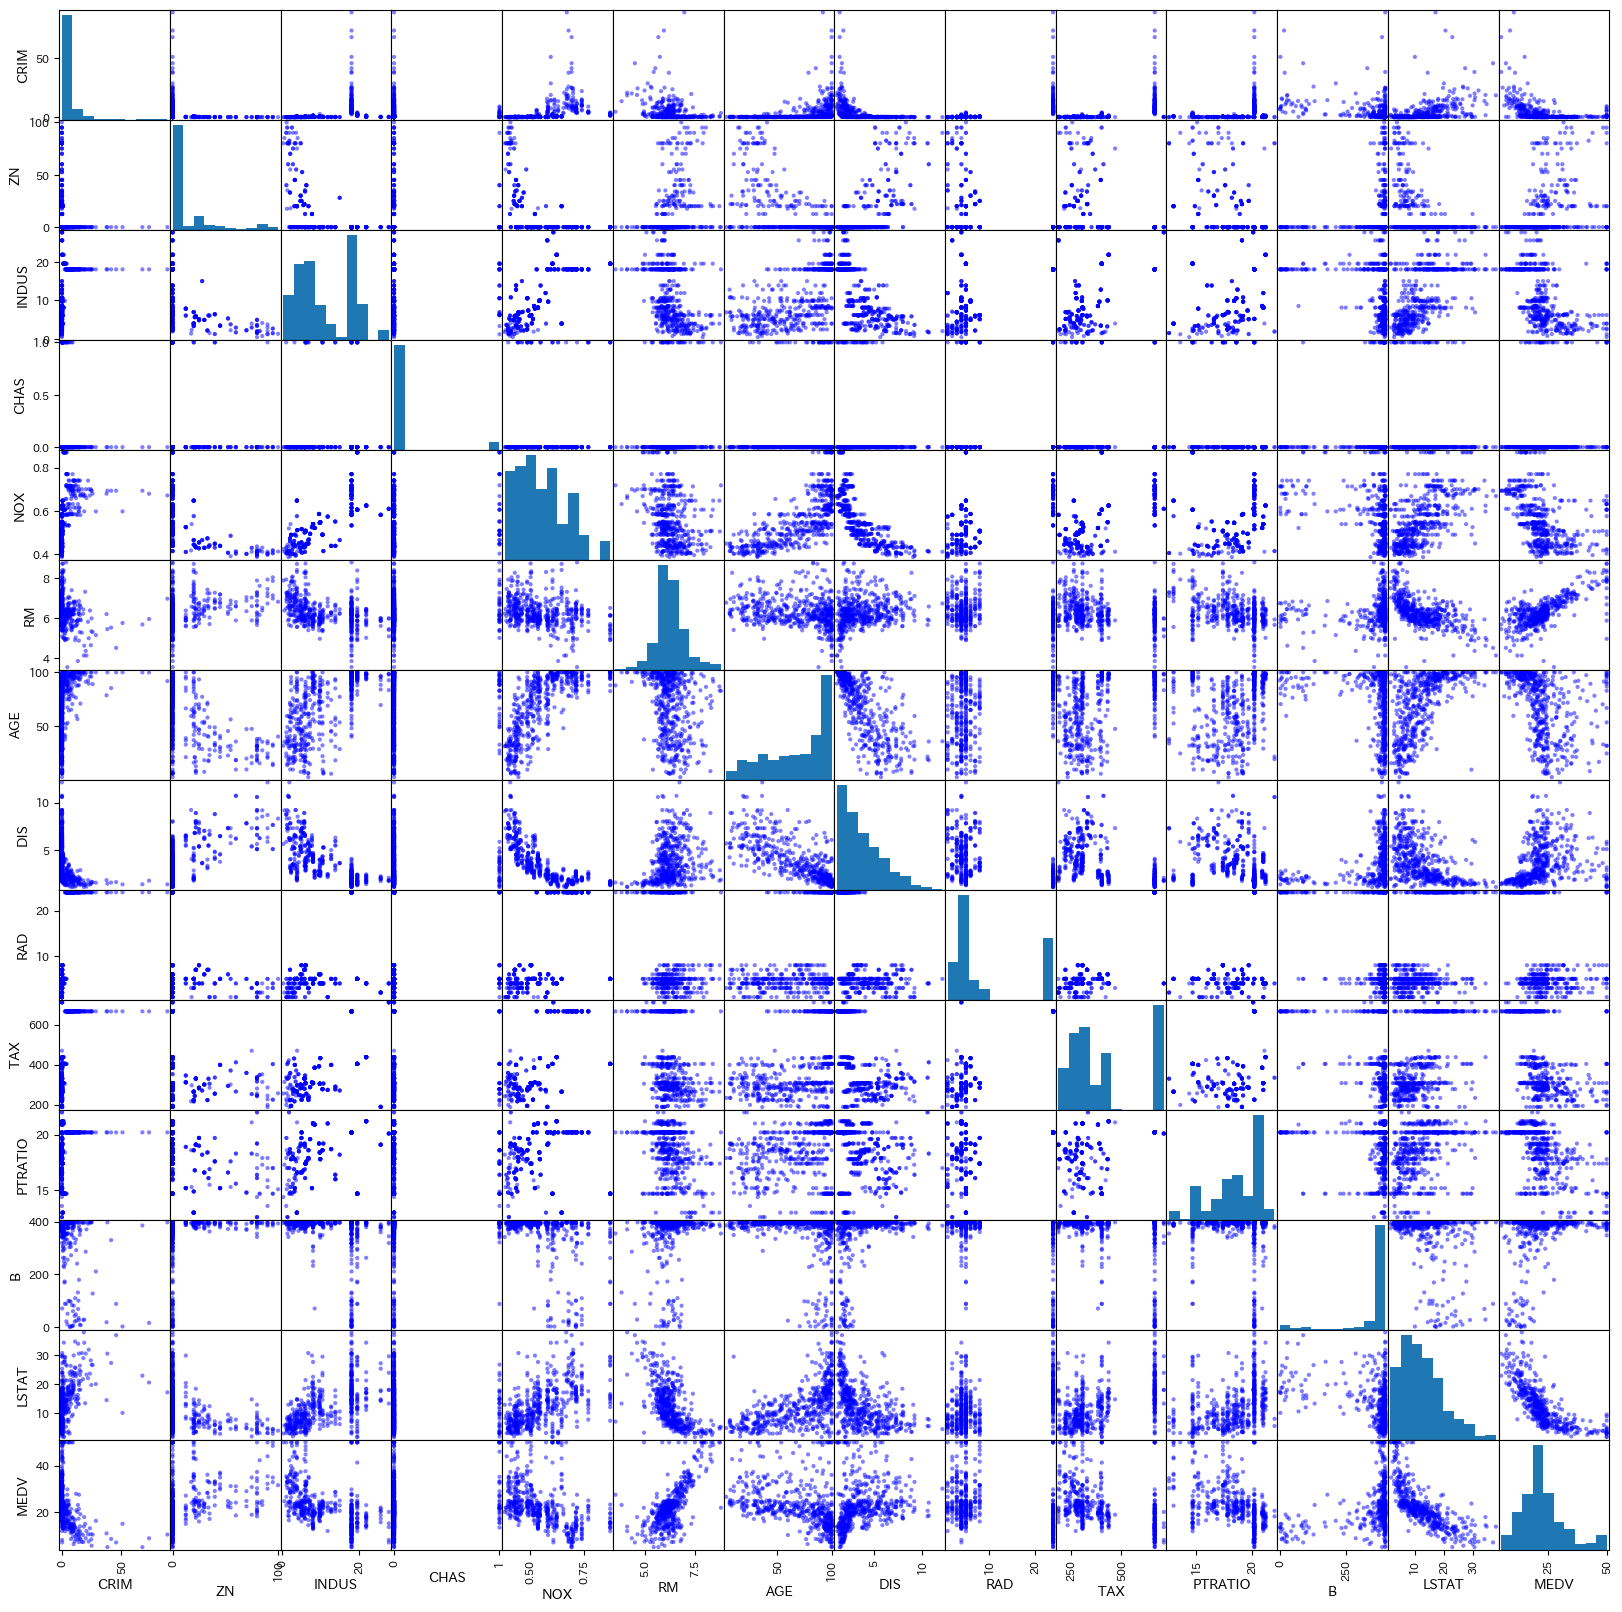

In [55]:
#相関分析
pd.plotting.scatter_matrix(boston_df, c='b', figsize=(20,20))

<AxesSubplot:>

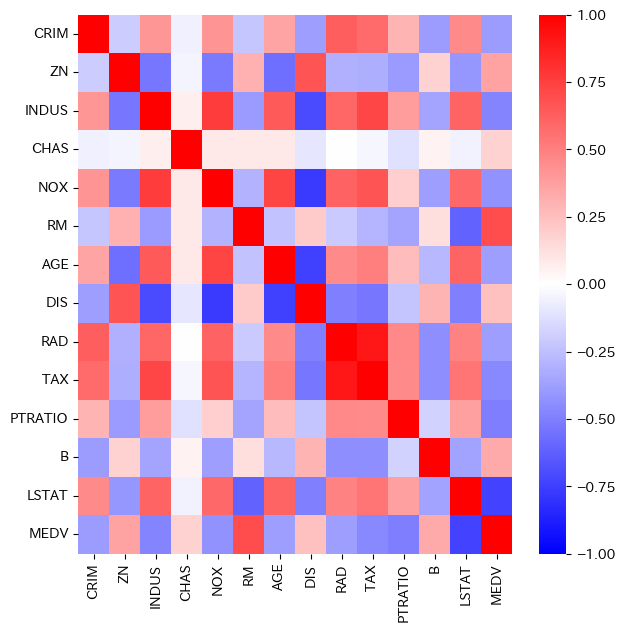

In [58]:
#ピアソン相関
plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(boston_df).corr('pearson'), annot=False, vmin=-1, vmax=1, cmap='bwr', cbar=True)

<AxesSubplot:>

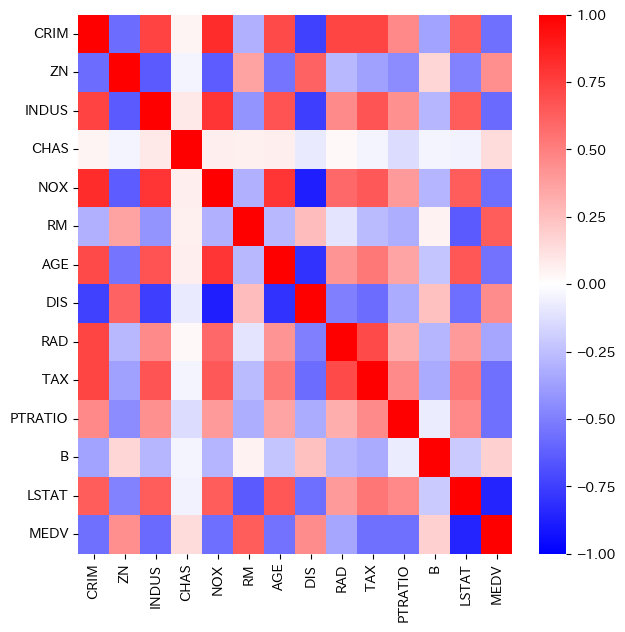

In [59]:
#スペアマン相関
plt.figure(figsize=(7, 7))
sns.heatmap(pd.DataFrame(boston_df).corr(method='spearman'), annot=False, vmin=-1, vmax=1, cmap='bwr', cbar=True)

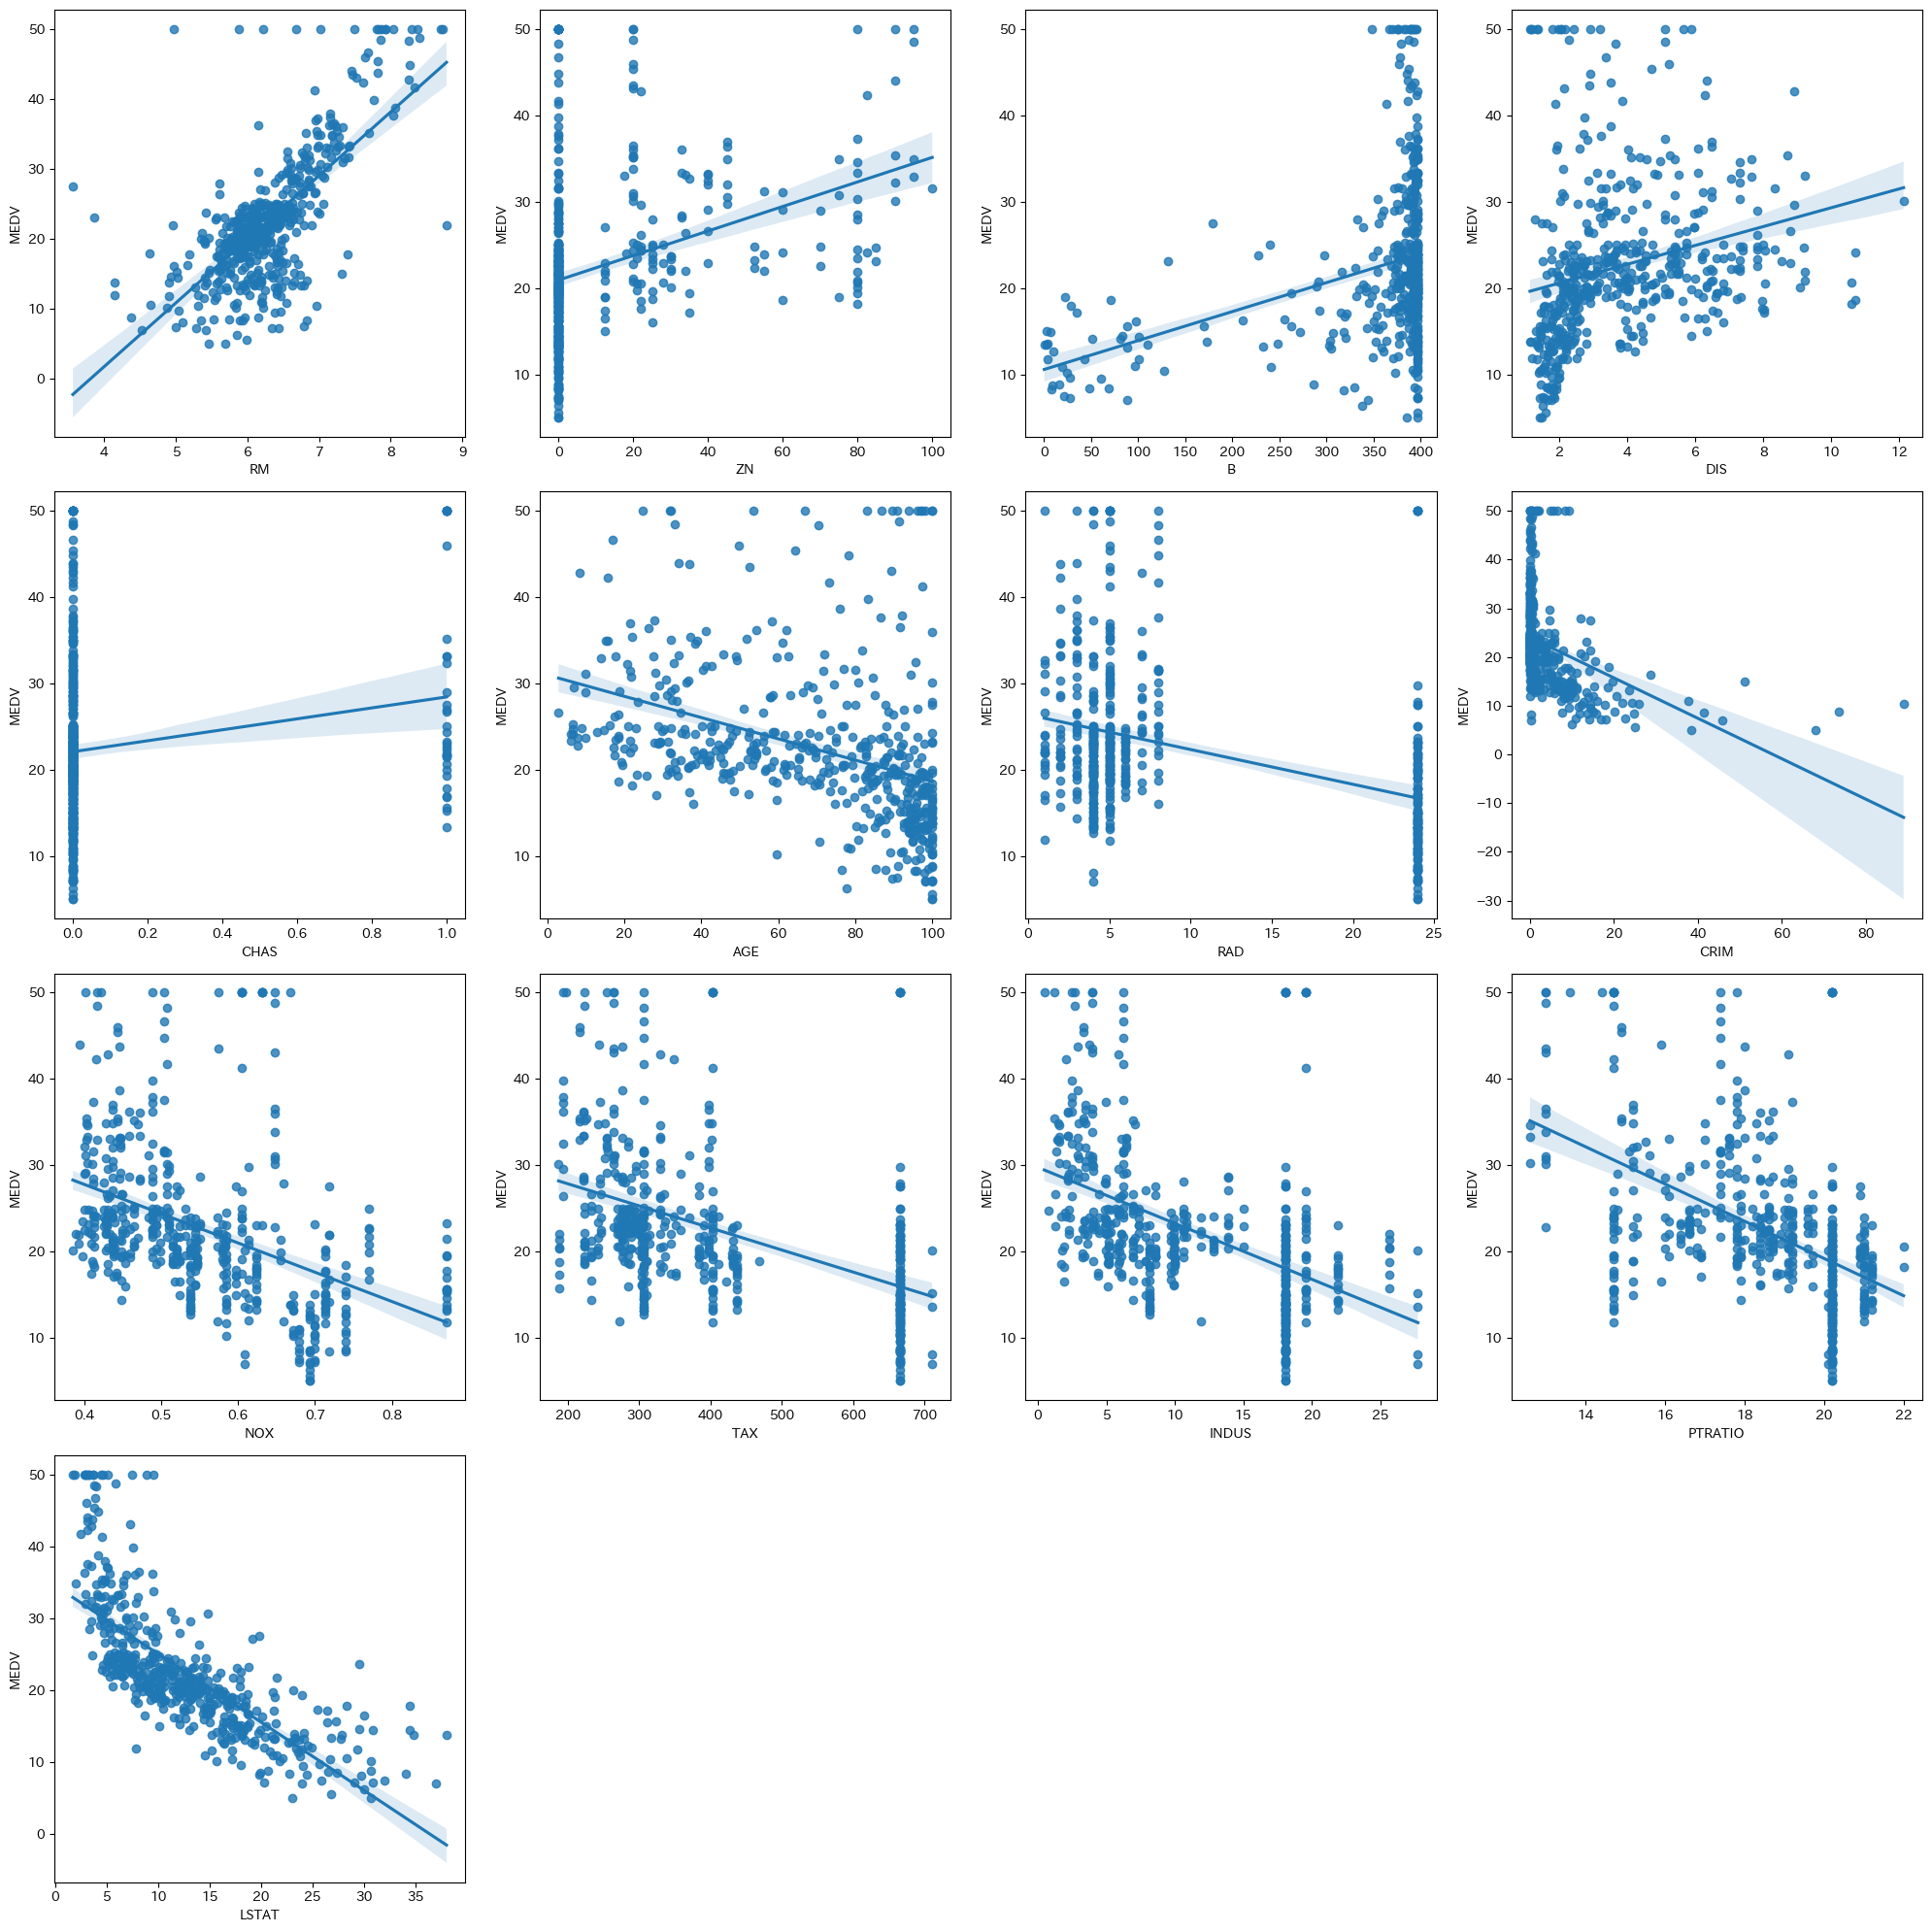

In [83]:
#目的変数との関係性を確認
def target_ralation(tgt, data):
    y_train = data[tgt]
    
    #heatmap
    k = len(data.columns)
    fig = plt.figure(figsize=(20,20))
    
    #各変数間の相関係数
    corrmat = data.corr()
    
    #nlargest:tgt列の最大値からk個分のデータを抽出
    # cols = corrmat.nlargest(k, tgt)[tgt].index
    
    #すべての特徴量を抽出するならソートの降順でよくない？
    cols = corrmat[tgt].sort_values(ascending=False).index
    
    for i in np.arange(1, k):
        X_train = data[cols[i]]
        ax = fig.add_subplot(4,4,i)
        sns.regplot(x=X_train, y=y_train)
        
    plt.tight_layout()
    plt.show()
    
target_ralation('MEDV', boston_df)

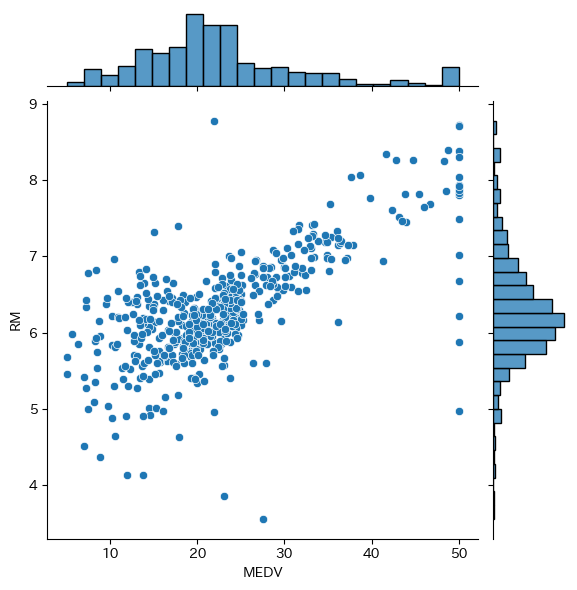

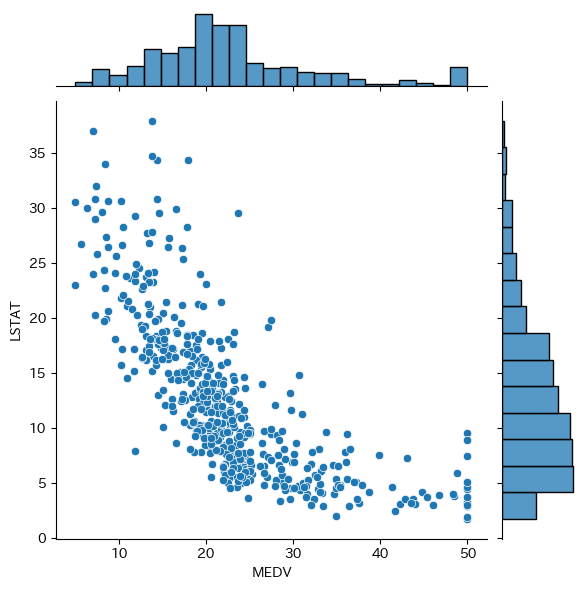

In [87]:
sns.jointplot(x='MEDV', y='RM', data=boston_df)
sns.jointplot(x='MEDV', y='LSTAT', data=boston_df)

"""
RMとLSTATは線形性がある
"""

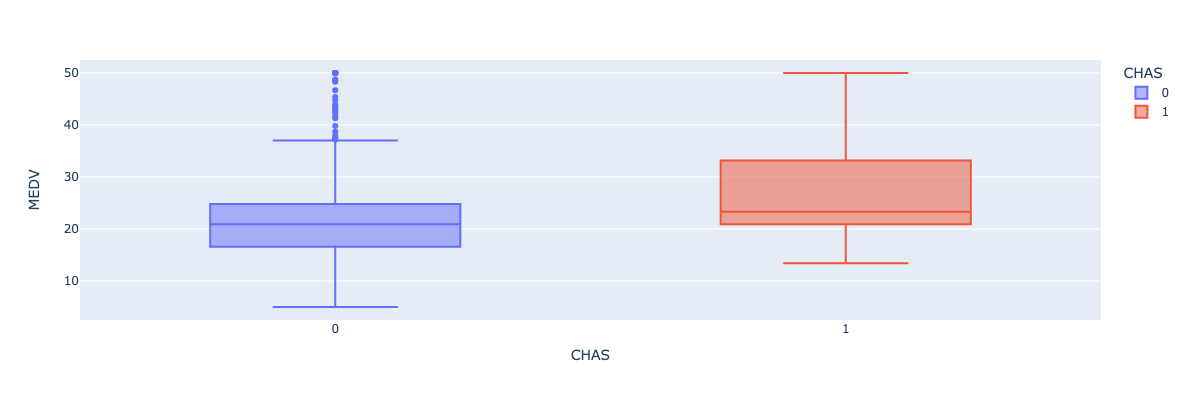

In [91]:
import plotly.express as px
fig = px.box(boston_df, x="CHAS", y="MEDV", color="CHAS", width=600, height=400)
fig.show()

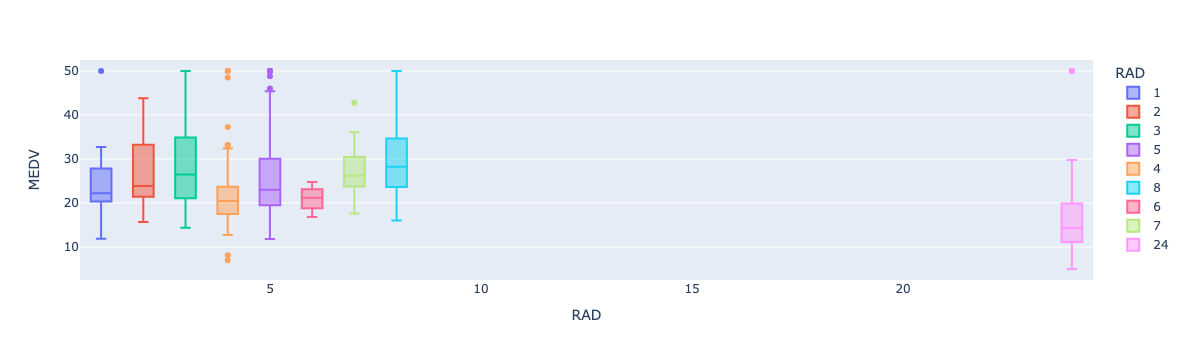

In [92]:
fig = px.box(boston_df, x="RAD", y="MEDV", color="RAD")
fig.show()

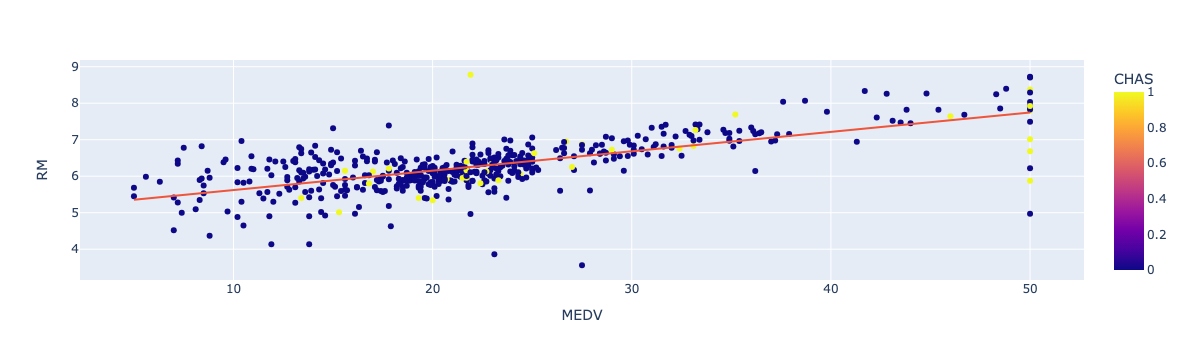

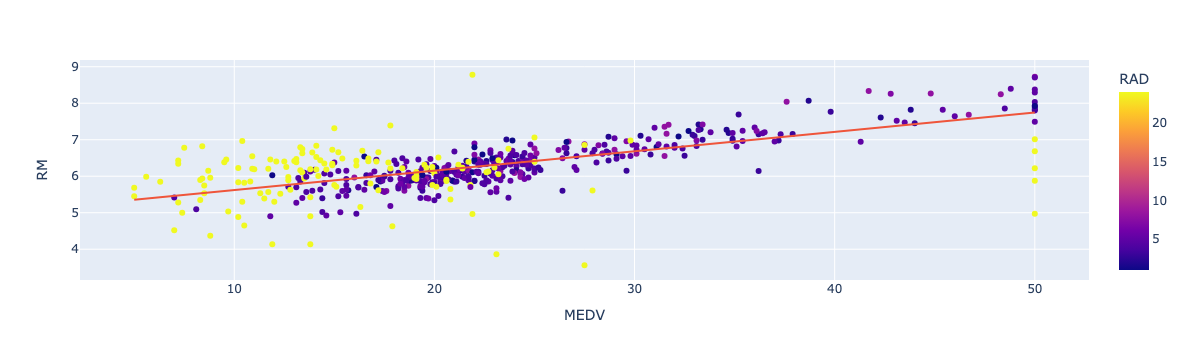

In [93]:
fig = px.scatter (boston_df, x = "MEDV", y = "RM", color = "CHAS",  trendline="ols")
fig.show()

fig = px.scatter(boston_df, x = "MEDV", y = "RM", color = "RAD",  trendline="ols")
fig.show()

"""

CHAS=0はノイズを含んでいる。
->単純にCHAS=1のサンプルが少ないからでは？

"""

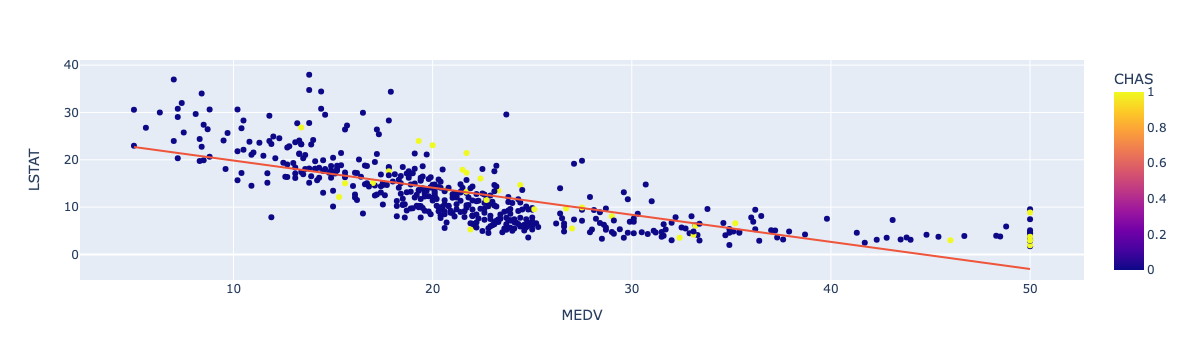

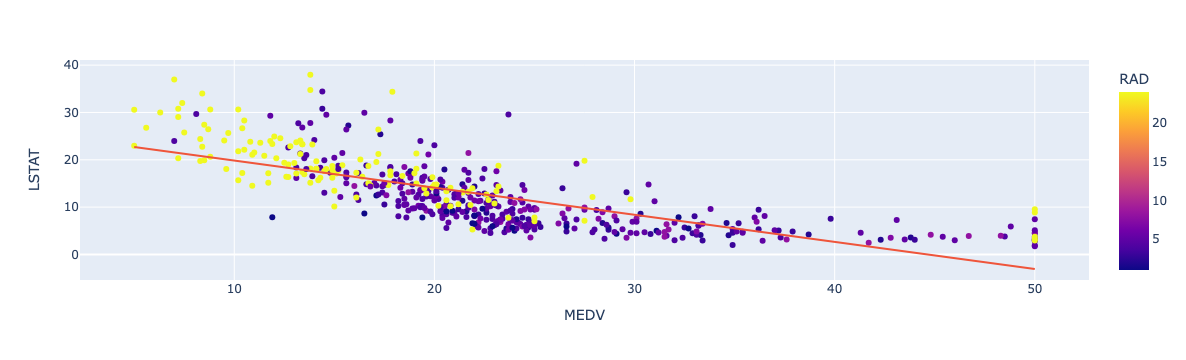

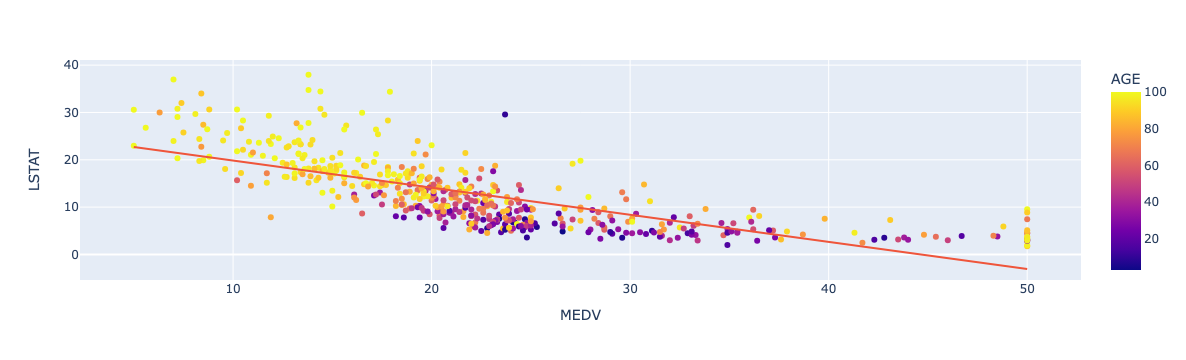

In [94]:
fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "CHAS",  trendline="ols")
fig.show()

fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "RAD",  trendline="ols")
fig.show()

fig = px.scatter (boston_df, x = "MEDV", y = "LSTAT", color = "AGE",  trendline="ols")
fig.show()

"""
RAD=24は外れる傾向がある。
AGE=80代以上は外れる傾向がある。

AGEならまだしも、RADに関しては納得かない、結構線形に乗ってる気がするけど
"""

<Figure size 20000x500 with 0 Axes>

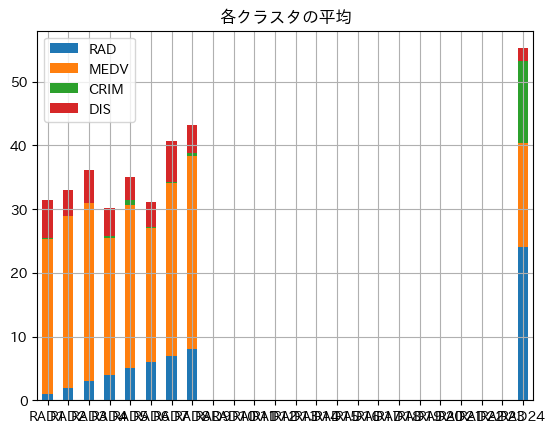

In [99]:
def stack_graph(columns):
    tgt_df = pd.DataFrame()
    for i in range(24):
        tgt_df['RAD' + str(i+1)] = boston_df[boston_df['RAD'] == i+1][columns].mean()
        
    plt.figure(figsize=[20,5])
    my_plot = tgt_df.T.plot(kind='bar', stacked=True, title='各クラスタの平均')
    my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)
    plt.grid()

columns = ['RAD', 'MEDV', 'CRIM', 'DIS']
stack_graph(columns)

<Figure size 20000x500 with 0 Axes>

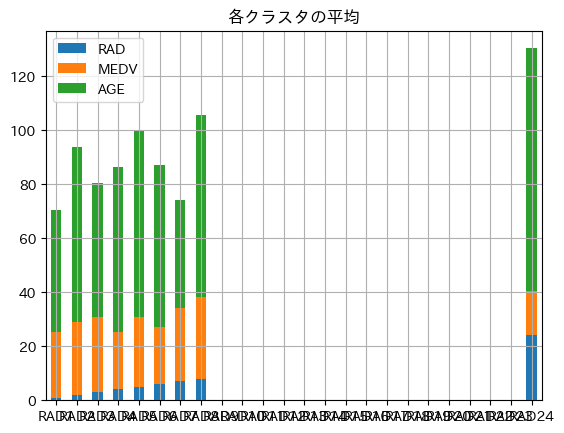

In [101]:
columns = ['RAD', 'MEDV', 'AGE']
stack_graph(columns)